In [4]:
import seaborn
import torch

In [5]:
graphs = torch.load('datasets/SG256_Full_Graphs_From_Enzo.pt')

In [3]:
dark_matter_masses = []
stellar_masses = []
redshifts = []
for graph in graphs:
  for x in graph.x:
    dark_matter_masses.append(x[0].item())
    redshifts.append(x[1].item())
  for y in graph.y:
    stellar_masses.append(y.item())

In [6]:
dark_matter_masses

[17270.15234375,
 19728.802734375,
 19728.802734375,
 485173568.0,
 485918624.0,
 14798.091796875,
 7399.791015625,
 4932.20068359375,
 483534464.0,
 17270.15234375,
 322455648.0,
 161227824.0,
 485173568.0,
 41931.15625,
 34525.40625,
 34525.40625,
 479064192.0,
 7399.791015625,
 4932.20068359375,
 36998.95703125,
 480703296.0,
 7399.791015625,
 14798.091796875,
 17270.15234375,
 477276096.0,
 28371.330078125,
 34525.40625,
 22202.353515625,
 17270.15234375,
 29593.205078125,
 19728.802734375,
 12331.9921875,
 475488000.0,
 23841.453125,
 27134.5546875,
 7399.791015625,
 9865.8916015625,
 9865.8916015625,
 17270.15234375,
 14798.091796875,
 14798.091796875,
 12331.9921875,
 17270.15234375,
 19728.802734375,
 472954848.0,
 22202.353515625,
 19728.802734375,
 24661.00390625,
 27134.5546875,
 14798.091796875,
 27134.5546875,
 32066.755859375,
 27134.5546875,
 27134.5546875,
 4932.20068359375,
 44389.8046875,
 36998.95703125,
 22202.353515625,
 41931.15625,
 36998.95703125,
 13585.1582031

In [7]:
stellar_masses

[0.0,
 0.0,
 0.0,
 3295505.75,
 3295505.75,
 0.0,
 0.0,
 0.0,
 3247353.25,
 0.0,
 3247353.25,
 3247353.25,
 3295505.75,
 0.0,
 0.0,
 0.0,
 3247353.25,
 0.0,
 0.0,
 0.0,
 3247353.25,
 0.0,
 0.0,
 0.0,
 3247353.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3247353.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3252629.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1367105.5,
 1780241.375,
 707147.9375,
 159598.65625,
 473006.59375,
 0.0,
 0.0,
 0.0,
 0.0,
 1036.44287109375,
 1036.44287109375,
 1036.44287109375,
 1036.44287109375,
 1036.44287109375,
 1036.44287109375,
 1036.44287109375,
 1036.44287109375,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3247353.25,
 3247353.25,
 3247353.25,
 3097018.5,
 0.0,
 3097018.5,
 2094715.0,
 2410690.5,
 3252716.0,
 3258092.5,
 0.0,
 0.0,
 3097018.5,
 2273294.75,
 2055990.0,
 2406001.75,
 2394787.5,
 2388122.75,
 3085

In [8]:
redshifts

[9.343400955200195,
 9.349823951721191,
 9.338054656982422,
 9.325244903564453,
 9.327377319335938,
 9.36806583404541,
 9.36806583404541,
 9.3809814453125,
 9.343400955200195,
 9.387452125549316,
 9.338054656982422,
 9.333780288696289,
 9.331645965576172,
 9.374520301818848,
 9.392849922180176,
 9.36806583404541,
 9.362693786621094,
 9.399333953857422,
 9.399333953857422,
 9.399333953857422,
 9.356254577636719,
 9.405826568603516,
 9.3809814453125,
 9.412327766418457,
 9.36806583404541,
 9.392849922180176,
 9.412327766418457,
 9.387452125549316,
 9.412327766418457,
 9.412327766418457,
 9.405826568603516,
 9.41775131225586,
 9.374520301818848,
 9.392849922180176,
 9.41775131225586,
 9.412327766418457,
 9.41775131225586,
 9.405826568603516,
 9.3809814453125,
 9.424267768859863,
 9.412327766418457,
 9.430790901184082,
 9.399333953857422,
 9.392849922180176,
 9.3809814453125,
 9.424267768859863,
 9.430790901184082,
 9.41775131225586,
 9.412327766418457,
 9.405826568603516,
 9.3993339538574

Text(0, 0.5, 'Stellar Mass (MSun)')

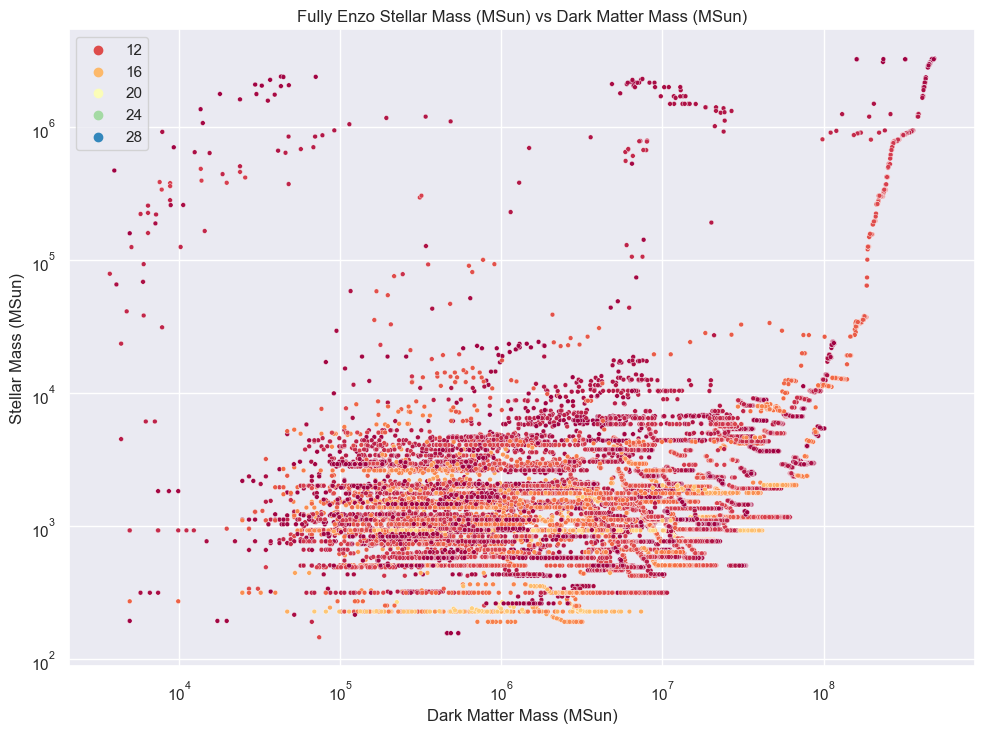

In [11]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
ax = seaborn.scatterplot(x=dark_matter_masses, y=stellar_masses, hue=redshifts, palette='Spectral',s=12)
ax.set_title('Fully Enzo Stellar Mass (MSun) vs Dark Matter Mass (MSun)')
ax.set_xscale('log')
ax.set_xlabel('Dark Matter Mass (MSun)')
ax.set_yscale('log')
ax.set_ylabel('Stellar Mass (MSun)')